# CHEDRAUI AB

In [1]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [3]:
# Especificar columnas
relevant_columns = ['SKU','Tienda','FORMATO','Categoria','CLASE','Sem','Existencia','fiDesplazamiento','VentaPromedio','Y_Faltante']
num_columns = ['Existencia','fiDesplazamiento','VentaPromedio']
cat_columns = ['SKU','Tienda','FORMATO','Categoria','CLASE','Sem']
target = ['Y_Faltante']

In [4]:
dtype = {'SKU':'object','FORMATO':'object','REGION':'object','Tienda':'object','Categoria':'object','Proveedor':'object','CLASE':'object','SCLASE':'object','Mes':'object','DiaSem':'object','Sem':'object','Existencia':'float','fiDesplazamiento':'float',
\
'VentaPromedio':'float','Y_Faltante':'int'}

In [5]:
# Abrir el archivo
file = '8semanas.csv'
data = pd.read_csv(file, header=0,low_memory=False, usecols=relevant_columns,dtype=dtype)
print('rows:', data.shape[0], ' columns:', data.shape[1])

rows: 3304660  columns: 10


In [6]:
# Abrir el archivo
file = 'datos_entrenamiento.csv'
data_2 = pd.read_csv(file, header=0,low_memory=False, encoding='latin-1',usecols=relevant_columns,dtype=dtype)
print('rows:', data_2.shape[0], ' columns:', data_2.shape[1])

rows: 5094322  columns: 10


In [7]:
data = pd.concat([data,data_2],join='inner')
print('rows:', data.shape[0], ' columns:', data.shape[1])

rows: 8398982  columns: 10


In [8]:
# Abrir el archivo que contiene el conjunto de validación 
file_val = 'datos_prueba.csv'
data_val = pd.read_csv(file_val, header=0,low_memory=False, usecols=relevant_columns,encoding='latin-1',dtype=dtype)
print('rows:', data_val.shape[0], ' columns:', data_val.shape[1])

rows: 842788  columns: 10


In [9]:
data = data.dropna()
data_val = data_val.dropna()

In [10]:
def segmentador_formato(frame,cadena):
    arreglo = frame[frame['FORMATO']==cadena]
    return arreglo 

In [11]:
chedraui_cd = segmentador_formato(data,'CHEDRAUI AB')
chedraui_cd_val = segmentador_formato(data_val,'CHEDRAUI AB')

yes %: 50.196821648175124- no %: 49.80317835182487


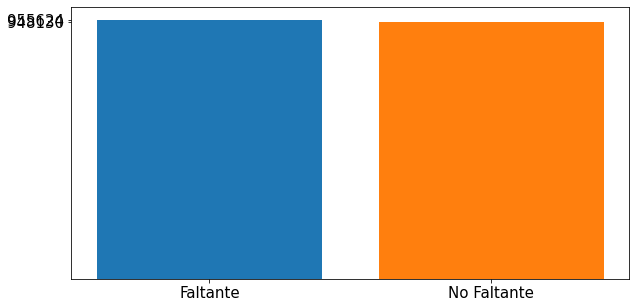

In [12]:
# Revisamos la proporción de datos
target = chedraui_cd['Y_Faltante']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Faltante", yes)
plt.bar("No Faltante", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
#Balanceamos a 50% - 50% nuestro conjunto de datos.
data_yes = chedraui_cd[chedraui_cd["Y_Faltante"] == 1]
data_no = chedraui_cd[chedraui_cd["Y_Faltante"] == 0]
over_sampling = data_yes.sample(no, replace=True, \
random_state = 0)
balanced_data = pd.concat([data_no, over_sampling], \
axis=0)
chedraui_cd = balanced_data.reset_index(drop=True)

yes %: 50.0- no %: 50.0


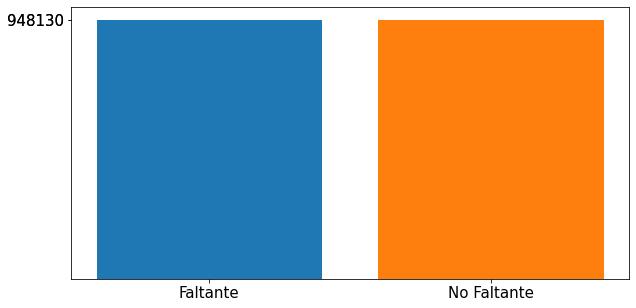

In [14]:
# Verificamos que el conjunto de datos está perfectamente balanceado
# Revisamos la proporción de datos
target = chedraui_cd['Y_Faltante']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Faltante", yes)
plt.bar("No Faltante", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [15]:
chedraui_cd = chedraui_cd.drop('FORMATO',axis=1)
chedraui_cd_val = chedraui_cd_val.drop('FORMATO',axis=1)

In [16]:
X_train = chedraui_cd.drop('Y_Faltante',axis=1)
y_train = chedraui_cd.Y_Faltante
X_val = chedraui_cd_val.drop('Y_Faltante',axis=1)
y_val = chedraui_cd_val.Y_Faltante

In [17]:
indices_categoricos = np.where(X_train.dtypes != float)[0]
indices_categoricos

array([0, 1, 2, 3, 4])

In [18]:
num_ind = np.where(X_train.dtypes != object)[0]
num_ind

array([5, 6, 7])

In [19]:
model = CatBoostClassifier(
    l2_leaf_reg=int(1.0),
    custom_loss=[metrics.Accuracy()],
    random_seed=0,
    logging_level='Verbose', # Write 'Silent' instead of 'verbose'
    task_type='GPU',
    #iterations=190
)

In [20]:
model.fit(
    X_train, y_train,
    cat_features=indices_categoricos,
    eval_set=(X_val, y_val),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6487959	test: 0.6502532	best: 0.6502532 (0)	total: 588ms	remaining: 9m 47s
1:	learn: 0.6095383	test: 0.6109697	best: 0.6109697 (1)	total: 966ms	remaining: 8m 2s
2:	learn: 0.5737491	test: 0.5764647	best: 0.5764647 (2)	total: 1.2s	remaining: 6m 39s
3:	learn: 0.5418874	test: 0.5453384	best: 0.5453384 (3)	total: 1.38s	remaining: 5m 43s
4:	learn: 0.5116908	test: 0.5154763	best: 0.5154763 (4)	total: 1.6s	remaining: 5m 18s
5:	learn: 0.4849542	test: 0.4890031	best: 0.4890031 (5)	total: 1.84s	remaining: 5m 5s
6:	learn: 0.4646927	test: 0.4717044	best: 0.4717044 (6)	total: 2.1s	remaining: 4m 57s
7:	learn: 0.4426645	test: 0.4511242	best: 0.4511242 (7)	total: 2.29s	remaining: 4m 43s
8:	learn: 0.4237794	test: 0.4321019	best: 0.4321019 (8)	total: 2.48s	remaining: 4m 33s
9:	learn: 0.4067875	test: 0.4151729	best: 0.4151729 (9)	total: 2.64s	remaining: 4m 21s
10:	learn: 0.3914624	test: 0.4007192	best: 0.4007192 (10)	total: 2.84s	remaining: 4m 15s
11:	learn: 0.3780712	test: 0.3876477	best: 0.3

In [21]:
print('Ago Model')
print('Tree count: {}'.format(model.tree_count_))
print('Accuracy: {:.5}'.format(accuracy_score(y_val, model.predict(X_val))))
print('True Positive Rate: {:.5}'.format(recall_score(y_val, model.predict(X_val))))
print('Precision: {:.5}'.format(precision_score(y_val, model.predict(X_val))))
print('Balanced Accuracy: {:.5}'.format(balanced_accuracy_score(y_val, model.predict(X_val))))
print('F1 Score: {:.5}'.format(f1_score(y_val, model.predict(X_val))))

Ago Model
Tree count: 53
Accuracy: 0.91211
True Positive Rate: 0.86751
Precision: 0.95238
Balanced Accuracy: 0.91209
F1 Score: 0.90797


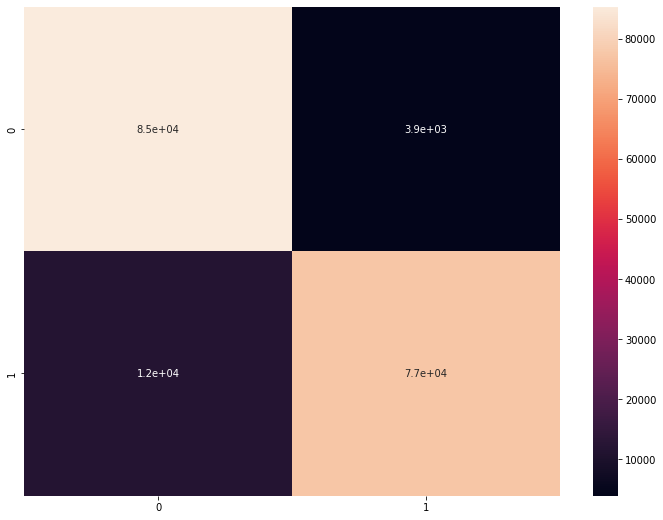

In [22]:
y_pred = model.predict(X_val)
# Dibujamos también la matriz de confusión para nuestro modelo
mat = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [23]:
y_pred = model.predict(X_val)
prediction_probs = model.predict_proba(X_val)

accuracy = accuracy_score(y_val,y_pred)
recall = recall_score(y_val,y_pred,average='binary',pos_label=1)
precision = precision_score(y_val,y_pred,average='binary',pos_label=0)
balanced_accuracy = balanced_accuracy_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred,pos_label=1)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.9121120032295685
True Positive Rate 0.8675096206706981
Precision 0.8784632168292783
Balanced accuracy 0.9120895073237263
f1 score 0.9079668152114562


In [24]:
# Calculamos las entradas de la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
tn,fp,fn,tp

(85355, 3866, 11809, 77322)

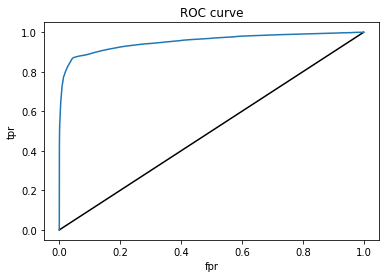

In [25]:
# Dibujamos la curva de ROC para este modelo
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba,pos_label=1)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

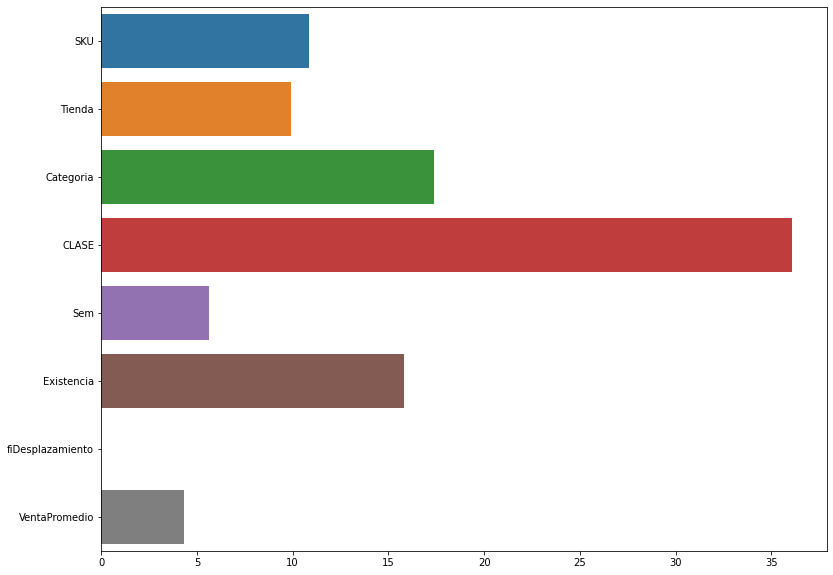

In [26]:
# Graficar la importancia de las variables
fi2 = pd.Series(model.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots(figsize = (13,10))
sns.barplot(x=fi2.values, y=fi2.index, ax=ax)
plt.show()

In [27]:
copia_general = X_val.copy()
copia_general['Y_Faltante'] = y_val
copia_general['Predicción_Ago'] = model.predict(X_val)
copia_general.to_csv('chedrauiab.csv',index=True)

## Vamos a tratar de implementar un corrector

In [28]:
nuevos_datos = chedraui_cd_val.copy()
#nuevos_datos['Predicción_Ago'] = model.predict(nuevos_datos.drop('Y_Faltante',axis=1))

In [29]:
nuevos_datos['Predicción_Ago'] = model.predict(nuevos_datos.drop('Y_Faltante',axis=1))

In [30]:
nuevos_datos[['0','1']] = model.predict_proba(nuevos_datos.drop(['Y_Faltante','Predicción_Ago'],axis=1))

In [31]:
nuevos_datos

,SKU,Tienda,Categoria,CLASE,Sem,Existencia,fiDesplazamiento,VentaPromedio,Y_Faltante,Predicción_Ago,0,1
0,3269530,CHEDRAUI MEXICO COAPA,JUGOS Y NÉCTARES,JUGOS Y NÉCTARES,25,43.0,29.0,290.00,0,0,0.945165,0.054835
2,3003153,CHEDRAUI MEXICO COAPA,PAÑALES,PAÑALES,25,0.0,13.0,1534.00,1,1,0.395407,0.604593
3,3406681,CHEDRAUI MEXICO COAPA,FOCOS,FOCOS,25,13.0,4.0,176.00,1,1,0.011014,0.988986
4,3657942,CHEDRAUI MEXICO COAPA,JABONES DE TOCADOR,JABONES DE TOCADOR,25,0.0,32.0,704.00,0,1,0.407130,0.592870
5,3269493,CHEDRAUI MEXICO COAPA,FOCOS,FOCOS,25,27.0,7.0,1146.46,1,1,0.004471,0.995529
...,...,...,...,...,...,...,...,...,...,...,...,...
794934,3104617,CHEDRAUI MERIDA CAUCEL,DESODORANTES CABALLERO,DESODORANTES CABALLERO,28,16.0,36.0,1768.68,1,0,0.861817,0.138183
794935,3610657,CHEDRAUI MERIDA CAUCEL,SHAMPOOS Y ACONDICIONADOR,SHAMPOOS Y ACONDICIONADOR,28,0.0,27.0,0.00,1,1,0.279228,0.720772
794936,3720524,CHEDRAUI MERIDA CAUCEL,QUESOS EMPACADOS,QUESOS EMPACADOS,28,0.0,1.0,0.00,1,1,0.136108,0.863892
794938,3189530,CHEDRAUI MERIDA CAUCEL,PAN,PAN,28,0.0,77.0,0.00,1,1,0.168168,0.831832


In [32]:
# 0 va a indicar acuerdo y 1 indica desacuerdo
faltante_real = nuevos_datos['Y_Faltante']
faltante_predicho = nuevos_datos['Predicción_Ago']
verdaderos_positivos = (faltante_real + faltante_predicho) % 2
nuevos_datos['Acuerdo'] = verdaderos_positivos 

In [33]:
# Aquí reportamos el numero de acuerdos y desacuerdos
verdaderos_positivos.value_counts()

0    162677
1     15675
dtype: int64

yes %: 8.788799677043151- no %: 91.21120032295686


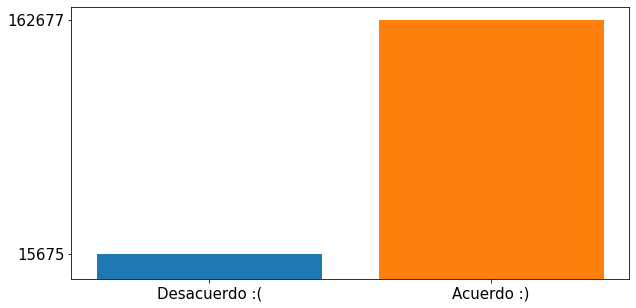

In [34]:
# Revisamos (de nuevo) la proporción de datos
target = verdaderos_positivos
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Desacuerdo :(", yes)
plt.bar("Acuerdo :)", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [35]:
buenas = nuevos_datos[nuevos_datos['Acuerdo']==0]
malas = nuevos_datos[nuevos_datos['Acuerdo']==1]

In [36]:
len(buenas)

162677

In [37]:
len(malas)

15675

In [38]:
pieza = buenas[0:len(malas)]
len(pieza)

15675

In [39]:
# El argumento de extrae vá a ser "y" donde  x = 100% - y & "y" es el porcentaje (del total) que quieres extraer
frame_final = pd.concat([malas,pieza],axis=0)

In [40]:
frame_final

,SKU,Tienda,Categoria,CLASE,Sem,Existencia,fiDesplazamiento,VentaPromedio,Y_Faltante,Predicción_Ago,0,1,Acuerdo
4,3657942,CHEDRAUI MEXICO COAPA,JABONES DE TOCADOR,JABONES DE TOCADOR,25,0.0,32.0,704.00,0,1,0.407130,0.592870,1
10,3596150,CHEDRAUI MEXICO COAPA,ASEO BUCAL,ASEO BUCAL,25,0.0,29.0,1099.68,0,1,0.406818,0.593182,1
11,3090410,CHEDRAUI MEXICO COAPA,CONDIMENTOS Y ESPECIES,CONDIMENTOS Y ESPECIES,25,0.0,35.0,805.00,0,1,0.419413,0.580587,1
32,3470720,CHEDRAUI MEXICO COAPA,DESMANCHADORES,DESMANCHADORES,25,0.0,41.0,810.16,0,1,0.155756,0.844244,1
36,3104581,CHEDRAUI MEXICO COAPA,VINOS TINTOS,VINOS TINTOS,25,12.0,13.0,965.25,1,0,0.923300,0.076700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45432,3356847,CHEDRAUI CUERNAVACA FLORES MAGON,CERVEZAS,CERVEZAS,27,25.0,67.0,18368.72,0,0,0.935846,0.064154,0
45433,3333191,CHEDRAUI CUERNAVACA FLORES MAGON,COMIDA CONGELADA,COMIDA CONGELADA,26,3.0,6.0,1458.00,1,1,0.004762,0.995238,0
45434,3646759,CHEDRAUI CUERNAVACA FLORES MAGON,TOALLAS FEMENINAS,TOALLAS FEMENINAS,26,0.0,8.0,0.00,1,1,0.071666,0.928334,0
45435,3256783,CHEDRAUI CUERNAVACA FLORES MAGON,COMIDA CONGELADA,COMIDA CONGELADA,27,23.0,106.0,11609.12,1,1,0.004797,0.995203,0


In [41]:
frame_final.to_csv('reporte_chedrauiab.csv',index=True)

### Aquí la idea es construir una muestra que sea 50 vs 50 tanto en acuerdo
### Posiblemente sea interesante también hacer una prueba con un modelo que tenga 50/50 tanto en acuerdo como en faltante contra no faltante 

yes %: 50.0- no %: 50.0


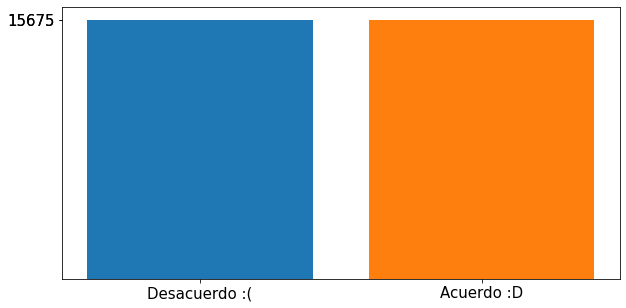

In [42]:
# Revisamos la proporción de datos
target = frame_final['Acuerdo']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Desacuerdo :(", yes)
plt.bar("Acuerdo :D", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [43]:
frame_final_features = frame_final[['Predicción_Ago','0','1']]
frame_final_target = frame_final.Y_Faltante

## Encajes de árboles

In [44]:
# Se construyen los conjuntos de entrenamiento y prueba sobre los que se aplicarán algoritmos de machine learning
X1_train, X1_val, y1_train, y1_val = train_test_split(frame_final_features, frame_final_target, test_size=0.2, random_state=0)
print('Entrenamiento:', X1_train.shape[0], ' Prueba:', X1_val.shape[0])

Entrenamiento: 25080  Prueba: 6270


In [45]:
from sklearn.ensemble import RandomTreesEmbedding
random_tree_embedding = RandomTreesEmbedding(random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

gb_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=1000))
gb_model.fit(X1_train, y1_train)

Pipeline(steps=[('randomtreesembedding', RandomTreesEmbedding(random_state=0)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

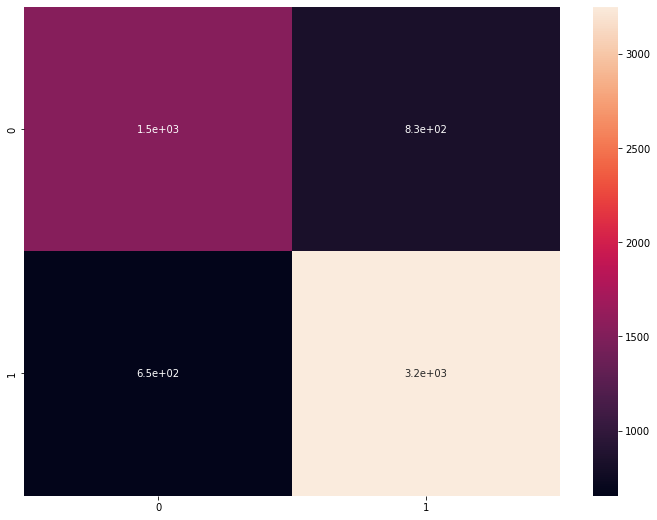

In [47]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = gb_model.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [48]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.7628389154704944
True Positive Rate 0.8324795081967213
Precision 0.795983345579231
Balanced accuracy 0.7402042511397808
f1 score 0.8138224614999373


## Usamos un sistema de recomendaciones

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)

gb.fit(X1_train, y1_train)

GradientBoostingClassifier(random_state=0)

In [50]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

def gbdt_apply(X, model):
    return model.apply(X)[:, :, 0]


gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gb}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000),
)
gbdt_model.fit(X1_train, y1_train)

/home/rlopez/anaconda3/envs/Algoritmo/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function gbdt_apply at 0x7faa2067c5e0>,
                                     kw_args={'model': GradientBoostingClassifier(random_state=0)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

/home/rlopez/anaconda3/envs/Algoritmo/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


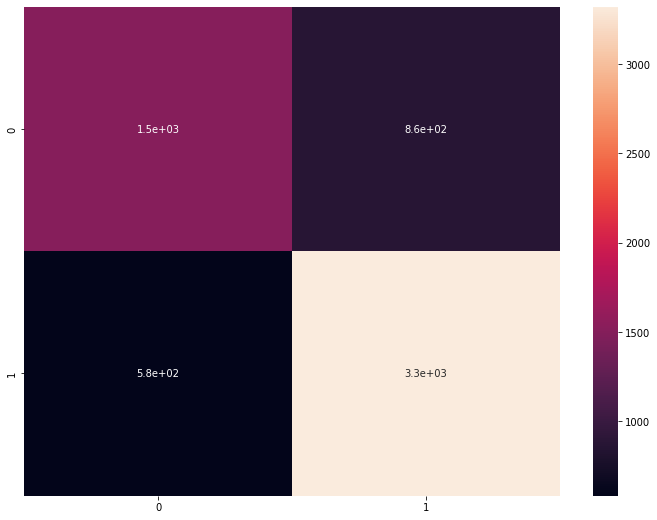

In [51]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = gbdt_model.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [52]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.769377990430622
True Positive Rate 0.8506659836065574
Precision 0.7937380497131931
Balanced accuracy 0.7429576748125771
f1 score 0.8212166172106825


## AdaBoost 

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X1_train, y1_train)
ada.predict(X1_val)
acc_train = ada.score(X1_train,y1_train)
acc_test = ada.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.7621, Presición validación: 0.7614


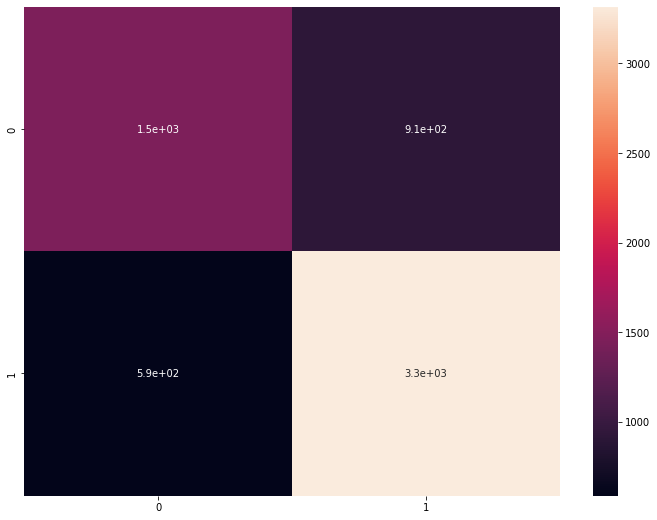

In [55]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = ada.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [56]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.7614035087719299
True Positive Rate 0.8496413934426229
Precision 0.7849029815428301
Balanced accuracy 0.7327243315480232
f1 score 0.8159901599015991


## Random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X1_train, y1_train)
rfc.predict(X1_val)
acc_train = rfc.score(X1_train,y1_train)
acc_test = rfc.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9621, Presición validación: 0.7936


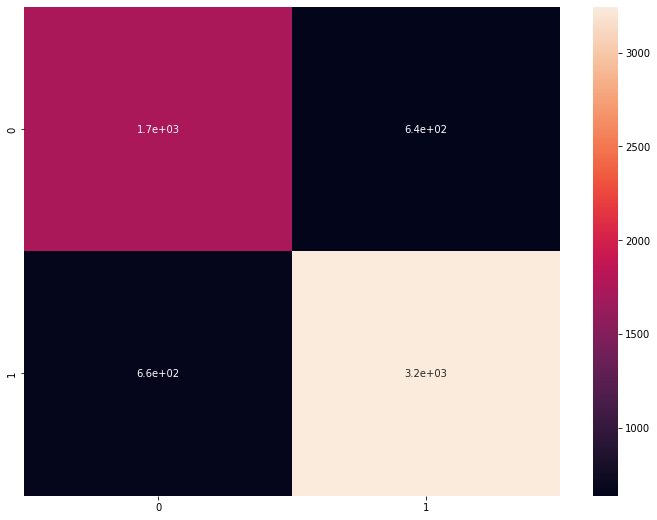

In [58]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = rfc.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [59]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.7936204146730462
True Positive Rate 0.8314549180327869
Precision 0.8361669242658424
Balanced accuracy 0.7813234015354129
f1 score 0.8338042640637041


## Vanilla LightGBM classifier

In [60]:
#from sklearn.ensemble import GradientBoostClassifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X1_train, y1_train)
lgbm.predict(X1_val)
acc_train = lgbm.score(X1_train,y1_train)
acc_test = lgbm.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.7688, Presición validación: 0.7627


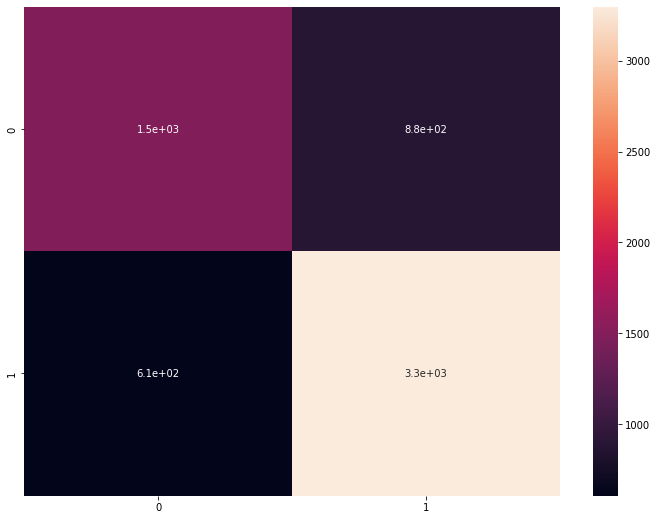

In [61]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = lgbm.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [62]:
tn, fp, fn, tp = confusion_matrix(y1_val, y_pred).ravel()
tn,fp,fn,tp

(1485, 881, 607, 3297)

In [63]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.7626794258373206
True Positive Rate 0.8445184426229508
Precision 0.7891335567257061
Balanced accuracy 0.7360800159015009
f1 score 0.815887156644395


## Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
ada = GaussianNB()
ada.fit(X1_train, y1_train)
ada.predict(X1_val)
acc_train = ada.score(X1_train,y1_train)
acc_test = ada.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

TypeError: fit() missing 1 required positional argument: 'y'

: 

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = lgbm.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_val, y_pred).ravel()
tn,fp,fn,tp

In [ ]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

## Local Cascade Ensemble

In [ ]:
# Entrenamos un LCE con los parametros por defecto
from lce import LCEClassifier
lce = LCEClassifier(n_jobs=-1, random_state=123)
lce.fit(X1_train, y1_train)
lce.predict(X1_val)
acc_train = lce.score(X1_train,y1_train)
acc_test = lce.score(X1_val,y1_val)
print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9844, Presición validación: 0.9437


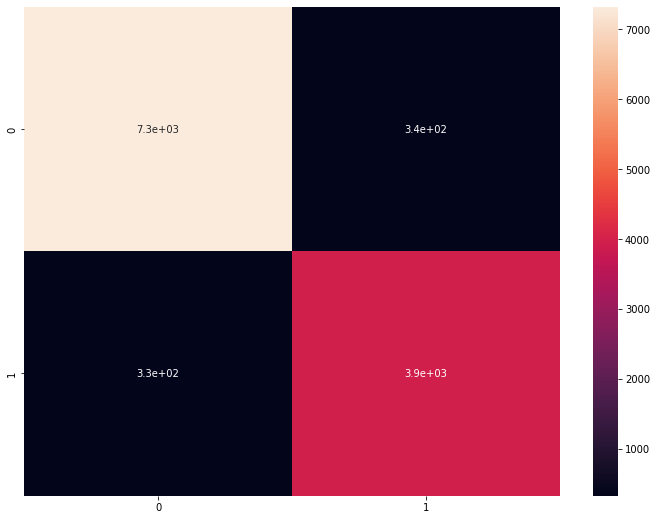

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = lce.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_val, y_pred).ravel()
tn,fp,fn,tp

(7320, 344, 328, 3937)

In [ ]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.9436666946097745
True Positive Rate 0.923094958968347
Precision 0.9196449427703808
Balanced accuracy 0.93910489075766
f1 score 0.9213667212731101


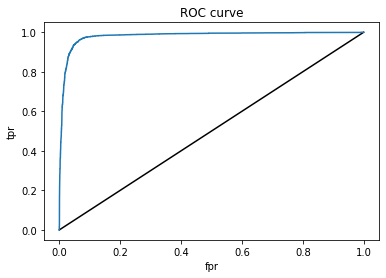

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = lce.predict_proba(X1_val)[:,1]
fpr, tpr, thresholds = roc_curve(y1_val, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Usamos un XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
xgb = RandomForestClassifier(random_state=0)
xgb.fit(X1_train, y1_train)
xgb.predict(X1_val)
acc_train = xgb.score(X1_train,y1_train)
acc_test = xgb.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9982, Presición validación: 0.974


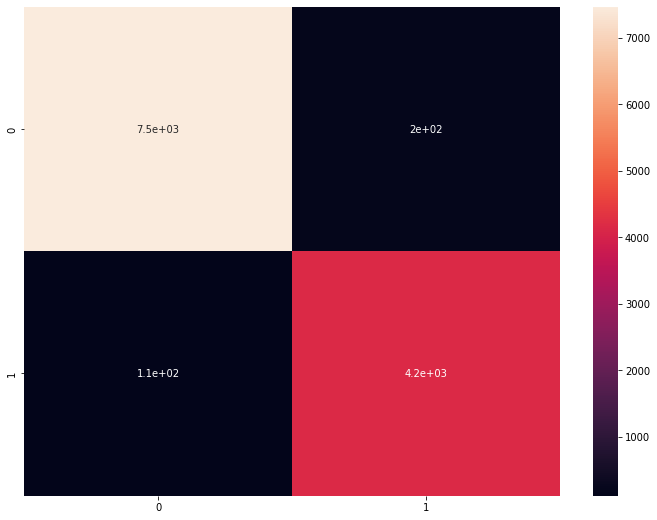

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = xgb.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [ ]:
# Calculamos las entradas de la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y1_val, y_pred).ravel()
tn,fp,fn,tp

(7466, 198, 112, 4153)

In [ ]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.9740129097158186
True Positive Rate 0.9737397420867526
Precision 0.9544932199494369
Balanced accuracy 0.9739523345089296
f1 score 0.964020427112349


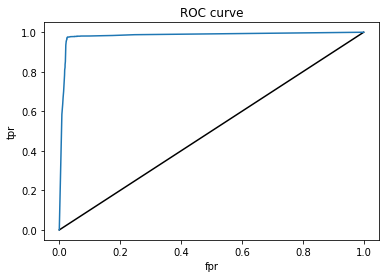

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = xgb.predict_proba(X1_val)[:,1]
fpr, tpr, thresholds = roc_curve(y1_val, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

### Usamos una red neuronal como corrector

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [ ]:
class Red_Ago(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 500)
        self.hidden_2 = nn.Linear(500, 500)
        self.hidden_3 = nn.Linear(500, 100)
        self.hidden_4 = nn.Linear(100, 10)
        self.hidden_5 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)

        self.batchnorm1 = nn.BatchNorm1d(500)
        self.batchnorm2 = nn.BatchNorm1d(500)
        self.batchnorm3 = nn.BatchNorm1d(100)
        self.batchnorm4 = nn.BatchNorm1d(10)

    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = self.batchnorm1(z)
        z = F.relu(self.hidden_2(z))
        z = self.batchnorm2(z)
        z = F.relu(self.hidden_3(z))
        z = self.batchnorm3(z)
        z = F.relu(self.hidden_4(z))
        z = self.batchnorm4(z)
        z = F.relu(self.hidden_5(z))

        out = F.log_softmax(self.output(z), dim=1)

        return out

In [ ]:
# Una red mucho más profunda
class Red_Ago3(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 500)
        self.hidden_2 = nn.Linear(500, 500)
        self.hidden_3 = nn.Linear(500, 100)
        self.hidden_4 = nn.Linear(100, 100)
        self.hidden_5 = nn.Linear(100, 100)
        self.hidden_6 = nn.Linear(100, 10)
        self.hidden_7 = nn.Linear(10, 10)
        self.hidden_8 = nn.Linear(10, 10)
        self.hidden_9 = nn.Linear(10, 10)
        self.hidden_10 = nn.Linear(10, 10)
        self.hidden_11 = nn.Linear(10, 10)
        self.hidden_12 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)

        self.batchnorm1 = nn.BatchNorm1d(500)
        self.batchnorm2 = nn.BatchNorm1d(500)
        self.batchnorm3 = nn.BatchNorm1d(100)
        self.batchnorm4 = nn.BatchNorm1d(100)
        self.batchnorm5 = nn.BatchNorm1d(100)
        self.batchnorm6 = nn.BatchNorm1d(10)
        self.batchnorm7 = nn.BatchNorm1d(10)
        self.batchnorm8 = nn.BatchNorm1d(10)
        self.batchnorm9 = nn.BatchNorm1d(10)
        self.batchnorm10 = nn.BatchNorm1d(10)
        self.batchnorm11 = nn.BatchNorm1d(10)

    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = self.batchnorm1(z)
        z = F.relu(self.hidden_2(z))
        z = self.batchnorm2(z)
        z = F.relu(self.hidden_3(z))
        z = self.batchnorm3(z)
        z = F.relu(self.hidden_4(z))
        z = self.batchnorm4(z)
        z = F.relu(self.hidden_5(z))
        z = self.batchnorm5(z)
        z = F.relu(self.hidden_6(z))
        z = self.batchnorm6(z)
        z = F.relu(self.hidden_7(z))
        z = self.batchnorm7(z)
        z = F.relu(self.hidden_8(z))
        z = self.batchnorm8(z)
        z= F.relu(self.hidden_9(z))
        z = self.batchnorm9(z)
        z = F.relu(self.hidden_10(z))
        z = self.batchnorm10(z)
        z = F.relu(self.hidden_11(z))
        z = self.batchnorm11(z)
        z = F.relu(self.hidden_12(z))

        out = F.log_softmax(self.output(z), dim=1)

        return out

In [ ]:
frame_final_features = frame_final[['Predicción_Ago','0','1']]
frame_final_target = frame_final.Y_Faltante

In [ ]:
# Aislamos las variables numéricas y realizamos un min-max scaling sobre ellas
#categorical = frame_final_train.drop(columns=['Existencia','fiDesplazamiento','VentaPromedio'])
#numerical = frame_final_train[['Existencia','fiDesplazamiento','VentaPromedio','0','1']]
#numerical_scaled = (numerical - numerical.min())/(numerical.max() - numerical.min())

In [ ]:
#frame_final_train = pd.concat([categorical,numerical_scaled], axis=1)

In [ ]:
# Se construyen los conjuntos de entrenamiento y prueba sobre los que se aplicarán algoritmos de machine learning
X1_train, X1_val, y1_train, y1_val = train_test_split(frame_final_features, frame_final_target, test_size=0.2, random_state=0)
print('Entrenamiento:', X1_train.shape[0], ' Prueba:', X1_val.shape[0])

Entrenamiento: 47715  Prueba: 11929


In [ ]:
X_test_torch = torch.tensor(X1_val.values).float()
y_test_torch = torch.tensor(y1_val.values)

In [ ]:
model1 = Red_Ago3(X1_train.shape[1])
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model1.parameters(), lr=0.001)

epochs = 100
batch_size = 100


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1,epochs+1):
    X_, y_ = shuffle(X1_train, y1_train)
    running_loss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)

        log_ps = model1(X_batch) 
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.to('cpu'), top_class.to('cpu'))

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        log_dev = model1(X_test_torch)
        dev_loss = criterion(log_dev, y_test_torch)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_test_torch.to('cpu'), top_class_dev.to('cpu'))

    if e%20 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.6f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.6f}.. ".format(dev_loss),
              "Training Accuracy: {:.6f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.6f}".format(acc))

In [ ]:
# Efectuamos un análisis de errores para la red neuronal RedAgo1
log_dev  = model1(X_test_torch)
dev_loss = criterion(log_dev, y_test_torch)
ps_dev = torch.exp(log_dev)
top_p, top_class_dev = ps_dev.topk(1, dim=1)

accuracy = accuracy_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
recall = recall_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
precision = precision_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
balanced_accuracy = balanced_accuracy_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
f1 = f1_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

In [ ]:
import math
import random 
# El imput 'frame' se refiere al dataframe al cual se le extraerá un subconjunto de elementos faltantes de anaquel en una proporción dada.
# Porcentaje_faltante es el porcentaje deseado de elementos que son NO faltante (es decir, el procentaje mayor). 

# Guardamos el número de elementos no faltantes en una variable
num_buenas = buenas.shape[0]

def extrae(frame,procentaje_no_faltante):
  faltantes = frame[frame['Y_Faltante']==1] # Extraemos los elementos que son faltante de anaquel
  a = (num_buenas*100)/procentaje_no_faltante - num_buenas 
  num_deseado_faltantes = int(math.floor(a))
  b = random.randint(0,faltantes.shape[0]-2)
  df = faltantes[b:b+1] # Tomamos un elemento faltante al azar
  while df['Y_Faltante'].shape[0] < num_deseado_faltantes:
    c = random.randint(0,faltantes.shape[0]-3)
    df2 = faltantes.iloc[c:c+1]
    df3 = pd.concat([df,df2],ignore_index=True)
    df = df3
  return df

In [ ]:
# Algunas funciones auxiliares 
import random 
import math

# Esta función va a crear un dataframe con porcentaje dado de faltante original
def crea_faltante(frame,porcentaje):
  
  num_deseado_faltantes = int(math.floor((frame.shape[0]*porcentaje)/100))
  a = random.randint(0,frame.shape[0]-2) # Tomamos el índice de una fila al azar
  df = frame[a:a+1] # Elegimos un renglón del dataset al azar para comenzar a construir un nuevo dataframe
  while df['Y_Faltante'].value_counts()[1] < num_deseado_faltantes:
    r = random.randint(0,frame.shape[0]-3)
    if frame['Y_Faltante'].iloc[r] == 1:
      df2 = frame.iloc[a:a+1]
      df3 = pd.concat([df,df2],ignore_index=True)
      df = df3
  return df


# Esta función va a crear un dataframe con porcentaje dado de faltante original
def crea_no_faltante(frame,porcentaje):
  num_deseado_faltantes = int(math.floor((frame.shape[0]*porcentaje)/100))
  a = random.randint(0,frame.shape[0]-2) # Tomamos el índice de una fila al azar
  df = frame[a:a+1] # Elegimos un renglón del dataset al azar para comenzar a construir un nuevo dataframe
  while df['Y_Faltante'].value_counts()[1] < num_deseado_faltantes:
    r = random.randint(0,frame.shape[0]-3)
    if frame['Y_Faltante'].iloc[r] == 0:
      df2 = frame.iloc[a:a+1]
      df3 = pd.concat([df,df2],ignore_index=True)
      df = df3